In [2]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import mglearn 
import seaborn as sns 

In [5]:
# 데이터 셋 준비
X, y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)
# reshape에서 (-1, n) 이란 -> 행을 n줄로 하고 열 수는 그에 알아서 맞추라

In [6]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


### 선형 회귀 모델, 의사결정트리 모델 학습 및 예측

In [7]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

In [8]:
#모델 선택, 학습 및 예측
linear = LinearRegression().fit(X,y)
decision=DecisionTreeRegressor(min_samples_split=3).fit(X,y)

pred_linear=linear.predict(line) # 선형 모델로 예측
pred_tree=decision.predict(line) # 의사결정 트리로 예측

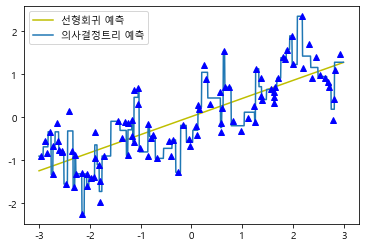

In [9]:
### 그래프 그려보기
plt.plot(line,pred_linear,'-',color='y',label='선형회귀 예측')
plt.plot(line,pred_tree,'-',label='의사결정트리 예측')
plt.legend(loc='best')

# 원래 데이터
plt.plot(X[:,0],y,'b^')

* 의사결정 트리는 학습용 데이터를 잘 예측함. 과적합 현상도 약간 있음. 


### 구간 분할을 적용

In [10]:
# -3~3
# 시작값과 끝값을 포함한 11개의 값 생성

bins=np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

### 구간 나누기

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

In [12]:
kb=KBinsDiscretizer(n_bins=10,strategy='uniform')
kb.fit(X)
print('bin edges : \n', kb.bin_edges_)

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [13]:
print(X.shape)
print(X[:5])
X_binned=kb.transform(X)
X_binned[:5].toarray()

(100, 1)
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
kb = KBinsDiscretizer(n_bins=10, strategy="uniform", encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
X_binned[0:10]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

1. line은 1000여개의 값을 가짐(-3,3)
2. line의 값을 구간분할해서 구간의 값을 갖는다
3. 각각의 모델 훈련시 구간 분할한 값을 이용한다
4. 구간적용 된 새로운 데이터로 예측을 수행한다.

In [15]:
# 구간 분할
kb=KBinsDiscretizer(n_bins=10, strategy='uniform',encode='onehot-dense')
kb.fit(X)

#학습용 데이터를 kb를 이용해 생성, 구간 분할 적용된 값 생성
X_binned=kb.transform(X)

# 새로운 데이터에 대해 구간분할 적용
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
line_binned=kb.transform(line)

print(X_binned.shape, line_binned.shape)

(100, 10) (1000, 10)


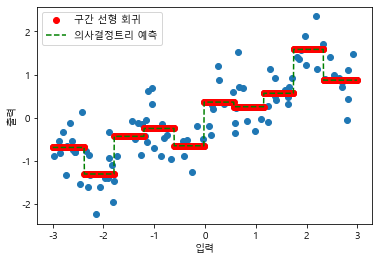

In [16]:
# 모델 선택, 훈련, 예측, 시각화
linear = LinearRegression().fit(X_binned, y)
decision = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)

pred_linear=linear.predict(line_binned)
pred_tree=decision.predict(line_binned)

plt.plot(X[:,0],y,'o')
plt.plot(line,pred_linear, 'ro',label='구간 선형 회귀')
plt.plot(line,pred_tree,'g--',label='의사결정트리 예측')

plt.xlabel('입력')
plt.ylabel('출력')
plt.legend(loc='best') # 레이블 달기

In [17]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

# 회귀 모델
reg = LinearRegression().fit(X_product, y)

# line_binned = kb.transform(line)
line_product = np.hstack([line_binned, line * line_binned])

print(line.shape)
print(line_binned.shape)

(100, 20)
(1000, 1)
(1000, 10)


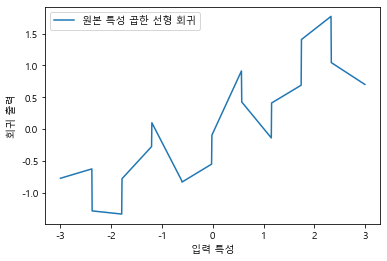

In [18]:
plt.plot(line, reg.predict(line_product), label="원본 특성 곱한 선형 회귀")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

### 비선형 변환

In [20]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal( size=(1000, 3) )
print(X_org.shape)

w = rnd.normal(size=3)
print(w.shape)

(1000, 3)
(3,)


In [21]:
X = rnd.poisson( 10 * np.exp(X_org) )
y = np.dot( X_org, w )

print(X.shape, y.shape)

(1000, 3) (1000,)


특성 출현 횟수 :
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

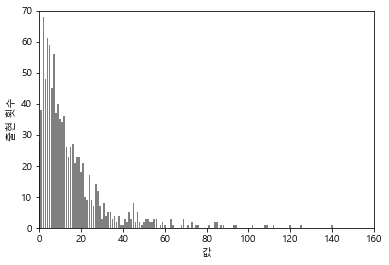

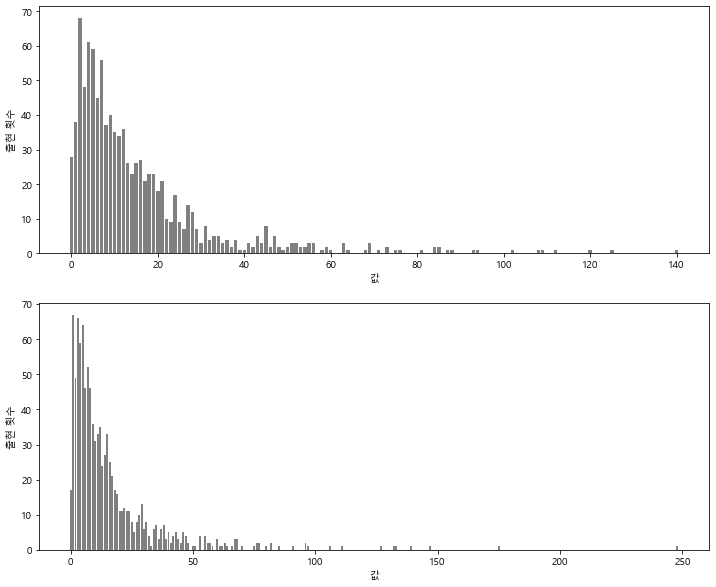

In [22]:
### 각 값이 가지는 것에 대해 확인해 보기
print("특성 출현 횟수 :\n",np.bincount(X[:,0]) )
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

### 릿지 회귀

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [24]:
# L2 : 릿지, L1 : 라소 회귀
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

score=Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.622


In [26]:
print(X_train.shape)

(750, 3)


In [25]:
X_train_log=np.log(X_train+1)
X_test_log=np.log(X_test+1)

(array([19.,  0.,  0., 31.,  0., 56.,  0., 37., 41., 44., 67., 29., 82.,
        50., 60., 65., 48., 32., 23., 21., 19.,  7.,  7.,  8.,  4.]),
 array([0.        , 0.19183162, 0.38366324, 0.57549487, 0.76732649,
        0.95915811, 1.15098973, 1.34282135, 1.53465297, 1.7264846 ,
        1.91831622, 2.11014784, 2.30197946, 2.49381108, 2.68564271,
        2.87747433, 3.06930595, 3.26113757, 3.45296919, 3.64480081,
        3.83663244, 4.02846406, 4.22029568, 4.4121273 , 4.60395892,
        4.79579055]),
 <BarContainer object of 25 artists>)

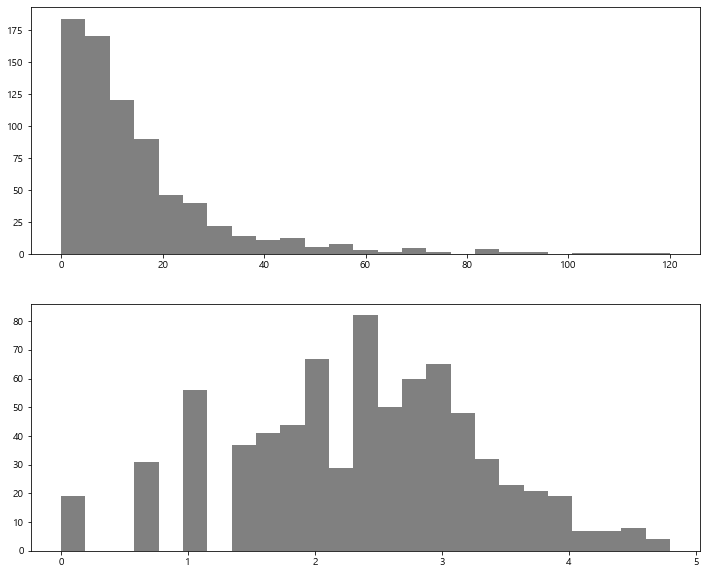

In [27]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.hist(X_train[:,0],bins=25,color='gray')

plt.subplot(2,1,2)
plt.hist(X_train_log[:,0],bins=25, color='gray')

In [28]:
score=Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.875
